## Importing The Python Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Loading The Datasets

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## **Explanatory Data Analysis**

# comprehensive overview of the train dataset

In [4]:
print(train.shape)
print(train.info())
print(train.describe().transpose())
print(train.head())

(13636, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB
None
                     cou

## Checking the unique values

In [5]:
train.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

# Checking if there's relationship between numerical features and rating

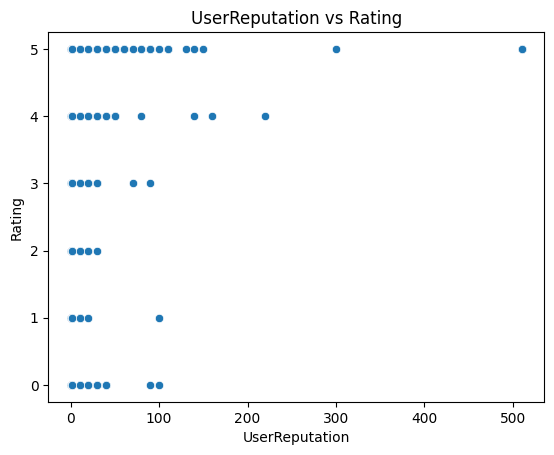

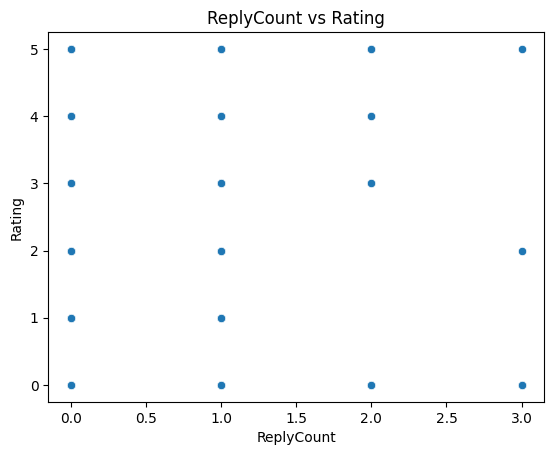

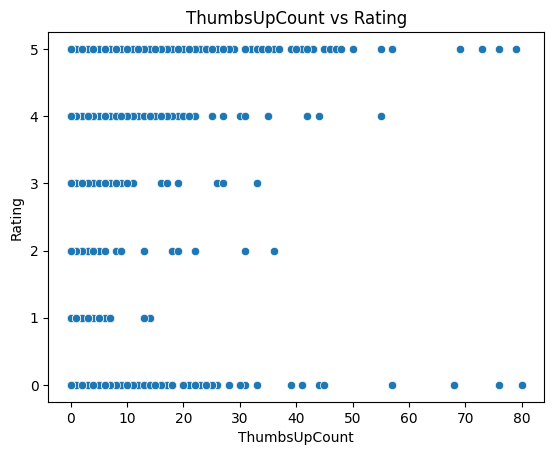

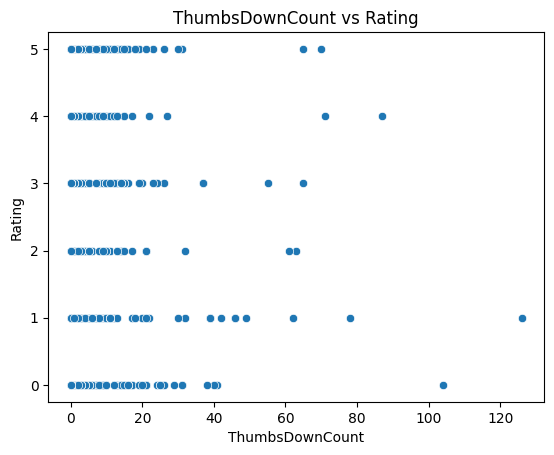

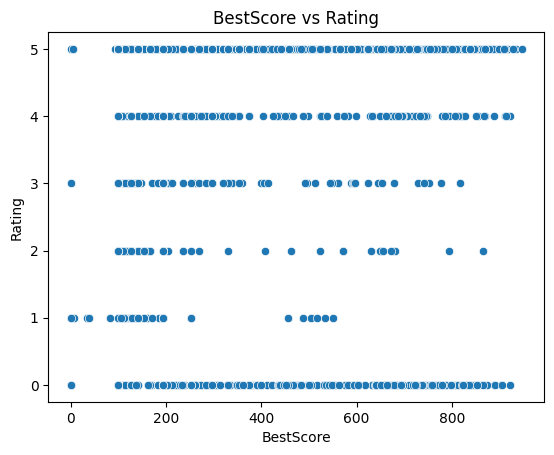

In [6]:
numerical_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount','BestScore']
for feature in numerical_features:
    sns.scatterplot(x=train[feature], y=train['Rating'])
    plt.title(f'{feature} vs Rating')
    plt.xlabel(feature)
    plt.ylabel('Rating')
    plt.show()

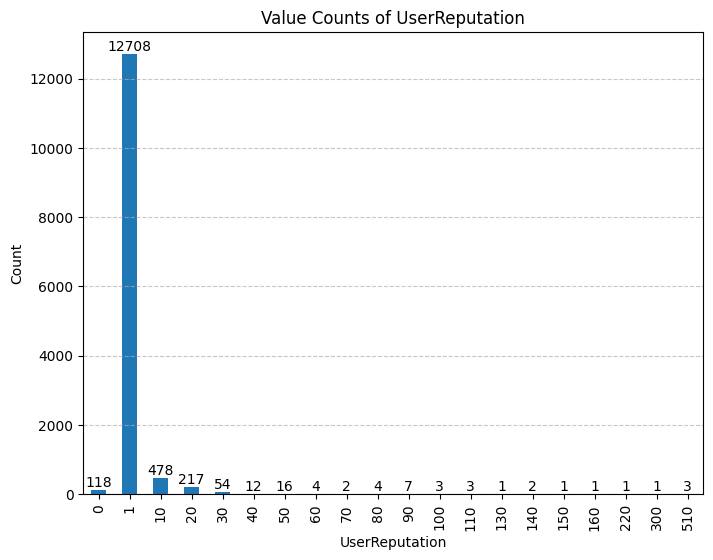

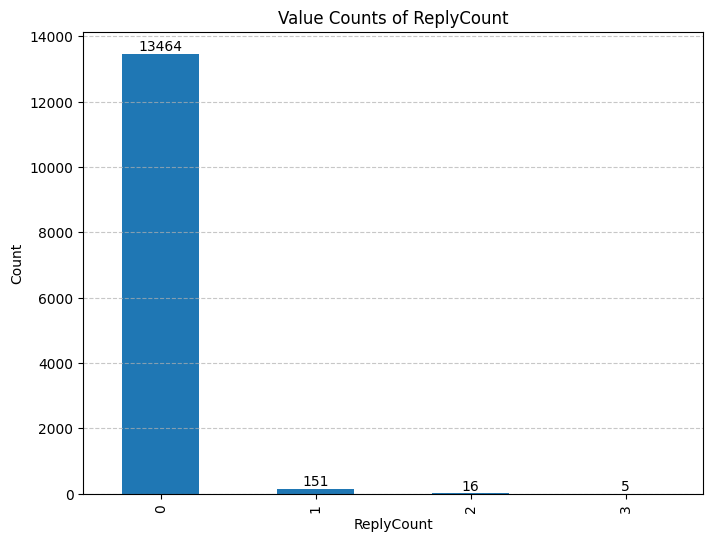

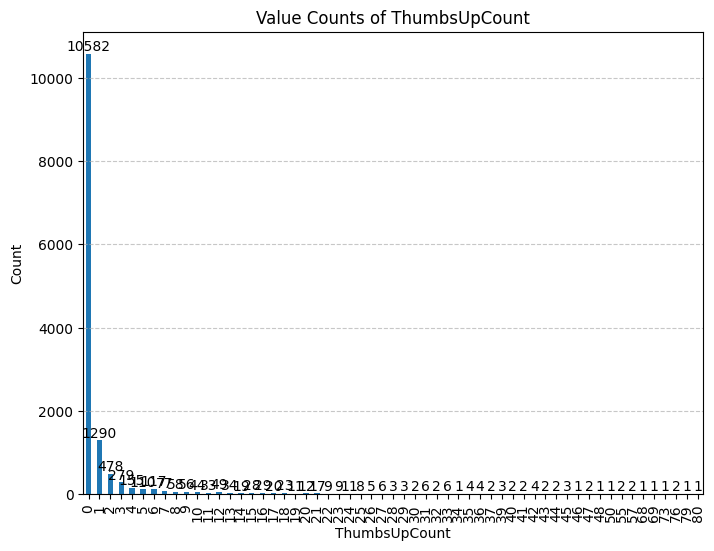

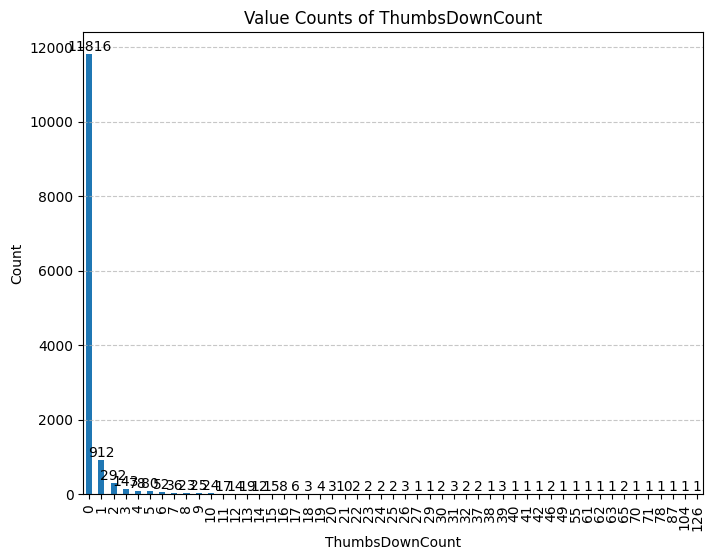

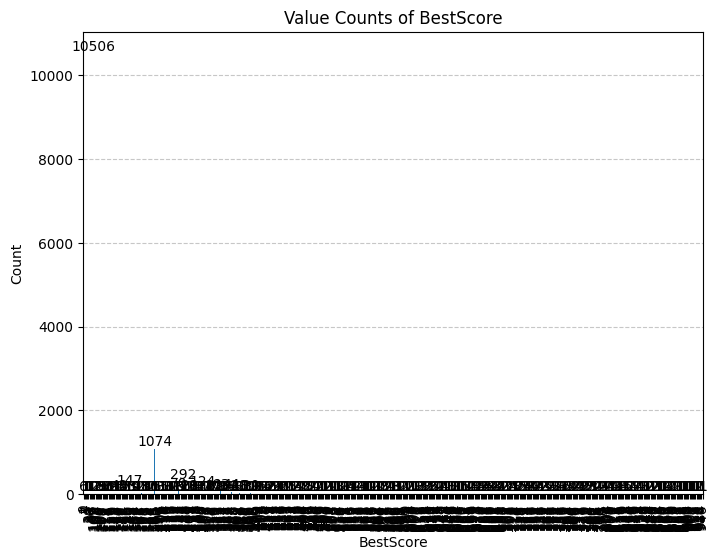

In [7]:
columns = train[['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount','BestScore']]

for col in columns:
    value_counts = train[col].value_counts().sort_index()
    plt.figure(figsize=(8, 6))
    
    ax = value_counts.plot(kind='bar')

    for i, count in enumerate(value_counts):
        ax.text(i, count, str(count), ha='center', va='bottom')

    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# **Conclusion : From the graphs we can tell there is some co-relation between 'UserReputation', 'ThumbsUpCount', 'ThumbsDownCount' and Rating column**
# **'ReplyCount','BestScore' are not much useful as they are not co-relating and their value count are either too low or too high,should be dropped**

## Checking Rating distribution 

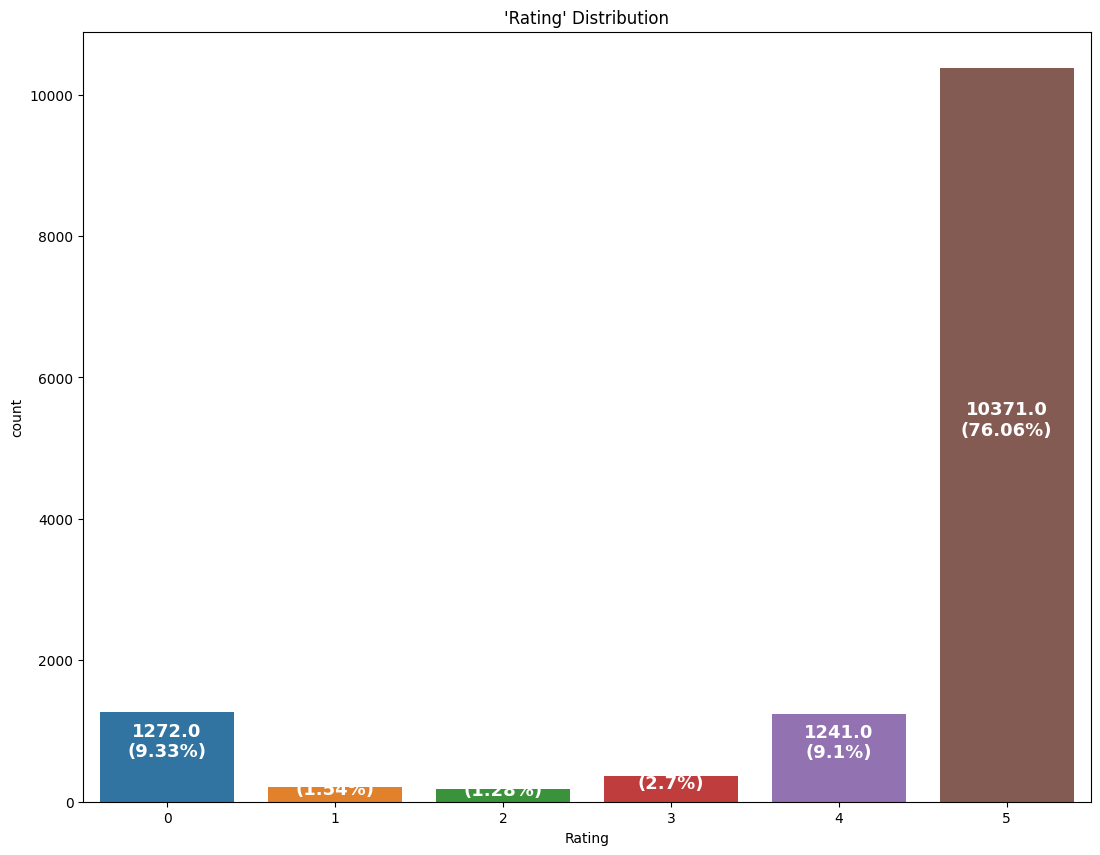

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
sns.countplot(x='Rating', data=train, ax=ax)
count = 0
for i in ax.patches:
    x = i.get_height() / 2
    height = i.get_height()
    ratio = round(height * 100 / len(train), 2)
    prn = f"{height}\n({ratio}%)"
    ax.text(count, x, prn, ha="center", color="white", rotation=0, fontweight="bold", fontsize="13")
    count += 1

plt.title("'Rating' Distribution")
plt.show()


# **Rating distribution is highly skewed**

# Extracting year, month, day, hour, and minute from 'CreationTimestamp' to check possible correaltion to rating

In [9]:
train['CreationTimestamp'] = pd.to_datetime(train['CreationTimestamp'], unit='s')
train['Month'] = train['CreationTimestamp'].dt.month
train['Day_of_Week'] = train['CreationTimestamp'].dt.day_name()
train['Day'] = train['CreationTimestamp'].dt.day
train['Hour'] = train['CreationTimestamp'].dt.hour
train['Minute'] = train['CreationTimestamp'].dt.minute
print(train.head())

    ID  RecipeNumber  RecipeCode                              RecipeName  \
0   70            71       12259  Banana Bars with Cream Cheese Frosting   
1   72            88        8202                        Simple Taco Soup   
2  458             3        2832                       Cheeseburger Soup   
3    7            50      100276               Grilled Huli Huli Chicken   
4   60            12       19731                        Cauliflower Soup   

                     CommentID                         UserID        UserName  \
0   sp_aUSaElGf_12259_c_149978  u_1oKVaBmiEKwAFyiHrDLoWpbel0J   misscoffeepot   
1    sp_aUSaElGf_8202_c_310332  u_1oKZeRIXYzGNhGW8OMR3O4lX1ih  MichelleMalone   
2    sp_aUSaElGf_2832_c_206522  u_1oKYHUtdaD48KJCDYq5wfpAUxWz       jeannem32   
3  sp_aUSaElGf_100276_c_434088  u_1oKZCQcKQZdQhDVBS7oISc216VA           ds422   
4   sp_aUSaElGf_19731_c_387011  u_1oKd4sudZQPgu6YALiC7bW7mKMs     SusanHoward   

   UserReputation   CreationTimestamp  ReplyCount  Thumb

## Average Rating by Month, Day of the month, Hour,  Day of the week 
## Rating count by days, Ratings by time

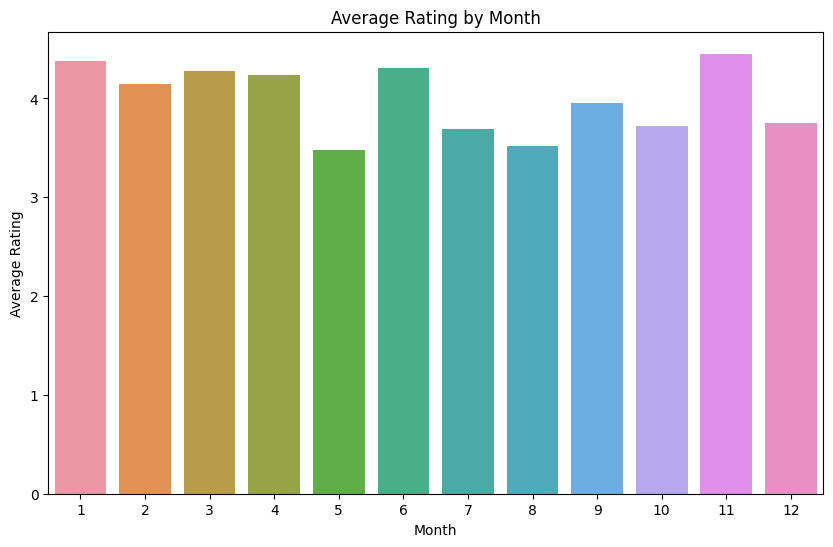

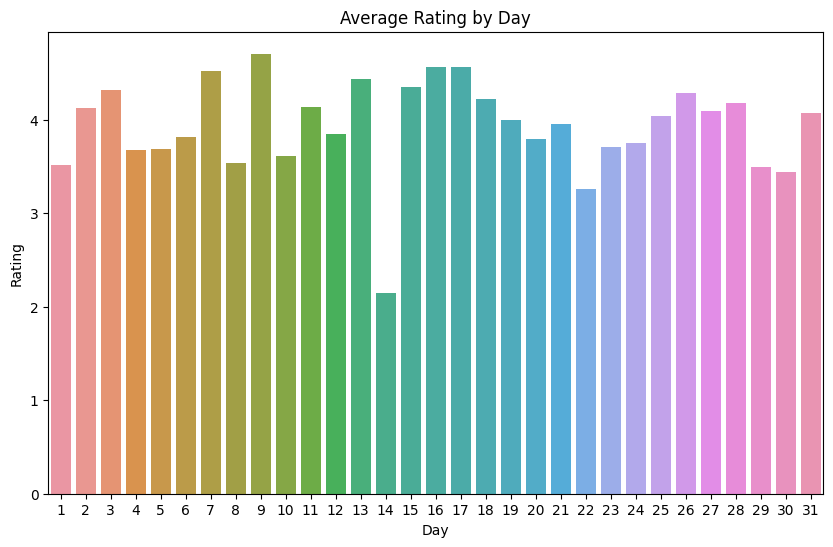

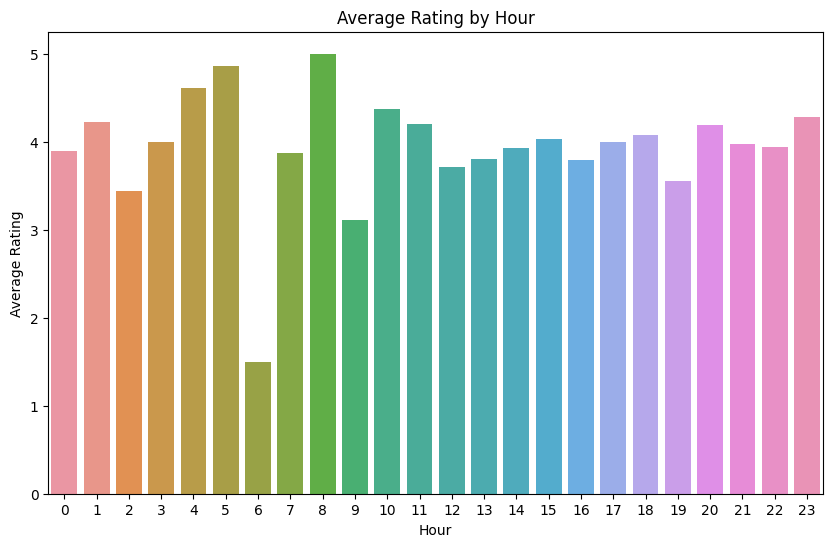

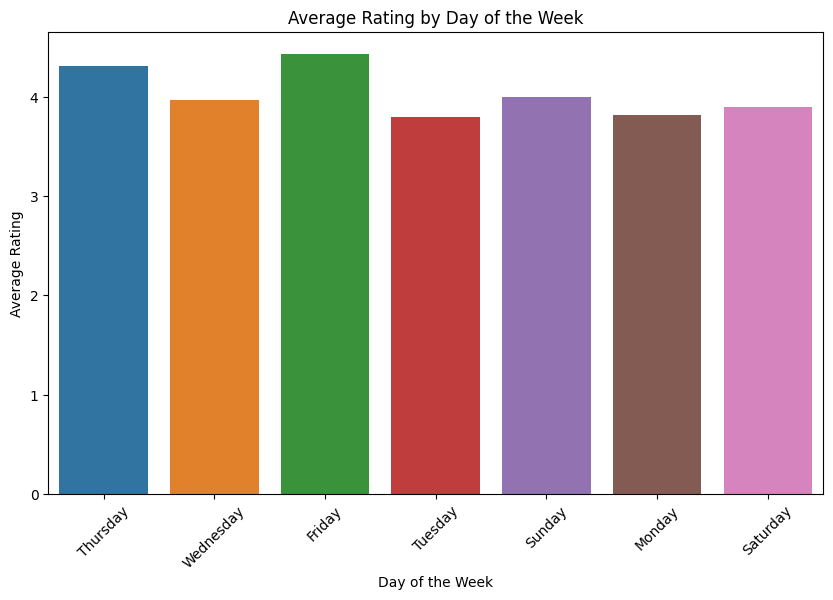

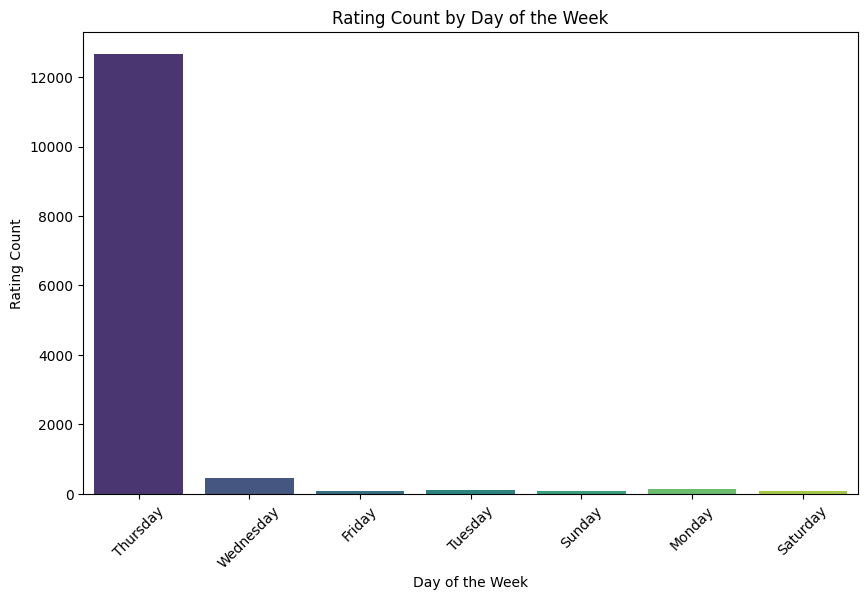

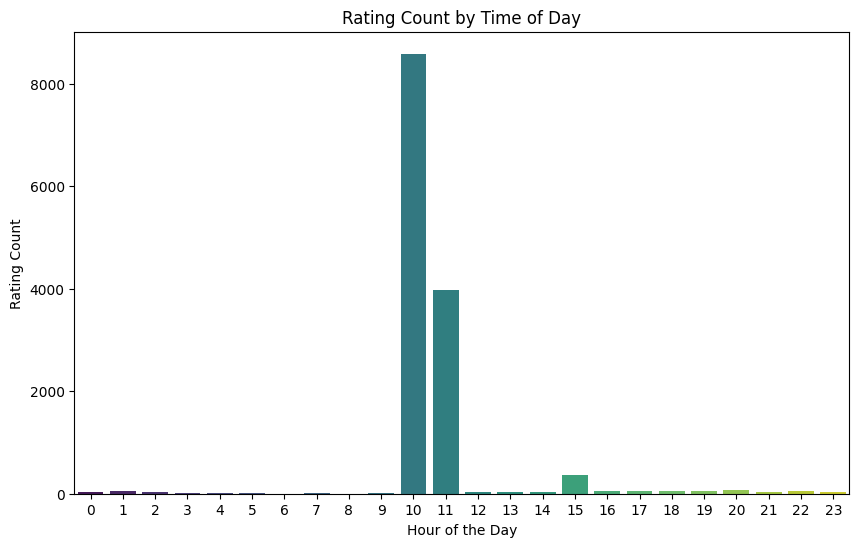

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rating', data=train, errorbar=None)
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Rating', data=train, errorbar=None)
plt.title('Average Rating by Day')
plt.xlabel('Day')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rating', data=train, errorbar=None)
plt.title('Average Rating by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Rating', data=train, errorbar=None)
plt.title('Average Rating by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=train, palette='viridis')
plt.title('Rating Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Rating Count')
plt.xticks(rotation=45)
plt.show()
 
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Hour',data=train, palette='viridis')
plt.title('Rating Count by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Rating Count')
plt.show()

# **We see Avarage Rating count is avarage at Best and we observe rating count is really high in Thursday and in 10-11am Except for that nothing conclusive found, should be dropped**


# **Conclusion from EDA : Only 3 Numberical features have significant relationship with Ratings, so we'll focus on Categorial features too**

# **Preprocessing**

# Drop columns that are not required

In [11]:
columns_to_drop = ['ID', 'RecipeCode', 'RecipeNumber','UserID', 
                   'CommentID', 'UserName','Hour','Minute','ReplyCount',
                   'CreationTimestamp','Month','Day' ,'Day_of_Week','BestScore']
train = train.drop(columns=columns_to_drop)
print(train.head())

                               RecipeName  UserReputation  ThumbsUpCount  \
0  Banana Bars with Cream Cheese Frosting              20              0   
1                        Simple Taco Soup               1              0   
2                       Cheeseburger Soup               1              0   
3               Grilled Huli Huli Chicken               1              0   
4                        Cauliflower Soup               1              0   

   ThumbsDownCount  Rating                                      Recipe_Review  
0                0       5  great recipe! I have made them just as written...  
1                1       5  This is an easy and quick recipe that is great...  
2                0       3  I think I was looking for something extra spec...  
3                0       5  This is our favorite grilled chicken recipe.  ...  
4                0       4  Great basic recipe. I added 2 teaspoons Tuscan...  


# Checking if data contains missing values

In [12]:
print(train.isna().sum()) 

RecipeName         0
UserReputation     0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
Recipe_Review      2
dtype: int64


# Imputing the missing value with most frequent one

In [13]:
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_imputer.fit_transform(train[['Recipe_Review']])

train[['Recipe_Review']] = categorical_imputer.fit_transform(train[['Recipe_Review']])

print(train.isnull().sum())

RecipeName         0
UserReputation     0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
Recipe_Review      0
dtype: int64


## **Creating functions**

# Making the text data more consisent by Lowercaseing, Decontracting, and Removing Special characters, Stopwords, Multiple spaces

In [14]:
import re

def lowercase_text(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return ""

def decontract_text(text):
    contractions = {
        "won't": "will not",
        "don't": "do not",
        "doesn't": "does not",
        "haven't": "have not",
        "wouldn't": "would not",
        "can't": "can not",
        "im": "i am",
        "yo": "you",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'ve": " have",
        "'m": " am"
    }
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    text = pattern.sub(lambda x: contractions[x.group()], text)
    return text

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

stopwords_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
                  'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
                  'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
                  'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
                  'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
                  'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
                  'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
                  'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
                  'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
                  'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
                  'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
                  'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
                  'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
                  's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're',
                  've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn',
                  'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word.lower() not in stopwords_list)

def remove_multiple_spaces(text):
    return re.sub(r'\s+', ' ', text)


# For training : Applying the preprocessing steps to the 'Recipe_Review' and 'RecipeName' column

In [15]:
train['Recipe_Review'] = train['Recipe_Review'].apply(lowercase_text)
train['Recipe_Review'] = train['Recipe_Review'].apply(decontract_text)
train['Recipe_Review'] = train['Recipe_Review'].apply(clean_text)
train['Recipe_Review'] = train['Recipe_Review'].apply(remove_stopwords)
train['Recipe_Review'] = train['Recipe_Review'].apply(remove_multiple_spaces)

train['RecipeName'] = train['RecipeName'].apply(lowercase_text)
train['RecipeName'] = train['RecipeName'].apply(decontract_text)
train['RecipeName'] = train['RecipeName'].apply(clean_text)
train['RecipeName'] = train['RecipeName'].apply(remove_stopwords)
train['RecipeName'] = train['RecipeName'].apply(remove_multiple_spaces)

print(train['Recipe_Review'],train['RecipeName'])

0        great recipe made written wonderfull moist del...
1        easy quick recipe great fall cool weather made...
2        think looking something extra special soup was...
3             favorite grilled chicken recipe great flavor
4        great basic recipe added teaspoons tuscan seas...
                               ...                        
13631    delicious easy make one minor change used corn...
13632    made pie family loved froze half made work pot...
13633                                                tasty
13634                    made numerous times good amp easy
13635    super added lb chopped bacon mine xtra chicken...
Name: Recipe_Review, Length: 13636, dtype: object 0        banana bars cream cheese frosting
1                         simple taco soup
2                        cheeseburger soup
3                grilled huli huli chicken
4                         cauliflower soup
                       ...                
13631            quick cream mushroom soup


## **Matching the columns in test data to train data**

In [16]:
columns_to_drop = ['ID', 'RecipeCode', 'RecipeNumber','UserID','ReplyCount','CommentID', 'UserName','CreationTimestamp','BestScore']
test = test.drop(columns=columns_to_drop)
print(test.head())

                     RecipeName  UserReputation  ThumbsUpCount  \
0  Black Bean ‘n’ Pumpkin Chili               1              0   
1                  Pumpkin Bars               1              0   
2                  Pumpkin Bars               1              0   
3           Porcupine Meatballs               1              4   
4       Easy Chicken Enchiladas               1              0   

   ThumbsDownCount                                      Recipe_Review  
0                0  This was so good!!  The pumpkin was perfect as...  
1                1  So good!   Could not stop eating them, so bad....  
2                0           I use a small ladle to fill muffin cups.  
3                3  I made this and followed the instructions as d...  
4                1  Very Good!  I used corn tortillas.  Used fresh...  


# For Testing : Applying the preprocessing steps to the 'Recipe_Review' and 'RecipeName' column

In [17]:
test['Recipe_Review'] = test['Recipe_Review'].apply(lowercase_text)
test['Recipe_Review'] = test['Recipe_Review'].apply(decontract_text)
test['Recipe_Review'] = test['Recipe_Review'].apply(remove_stopwords)
test['Recipe_Review'] = test['Recipe_Review'].apply(clean_text)
test['Recipe_Review'] = test['Recipe_Review'].apply(remove_multiple_spaces)

test['RecipeName'] = test['RecipeName'].apply(lowercase_text)
test['RecipeName'] = test['RecipeName'].apply(decontract_text)
test['RecipeName'] = test['RecipeName'].apply(remove_stopwords)
test['RecipeName'] =test['RecipeName'].apply(clean_text)
test['RecipeName'] = test['RecipeName'].apply(remove_multiple_spaces)

print(test['Recipe_Review'],test['RecipeName'])

0       good pumpkin perfect thickening agent im putti...
1       good could stop eating them bad good thing gav...
2                        use small ladle fill muffin cups
3       made followed instructions directed rice cook ...
4       good used corn tortillas used fresh chopped ja...
                              ...                        
4541    absolutely wonderful seafood recipe make whene...
4542    us definite omg tastes sinful lot less fat con...
4543       absolutely greateven husband grandson loved it
4544        followed directions tastes bland disappointed
4545    reading amazing reviews decided make disgustin...
Name: Recipe_Review, Length: 4546, dtype: object 0                    black bean n pumpkin chili
1                                  pumpkin bars
2                                  pumpkin bars
3                           porcupine meatballs
4                       easy chicken enchiladas
                         ...                   
4541                     

# The top 20 most frequent words in train data

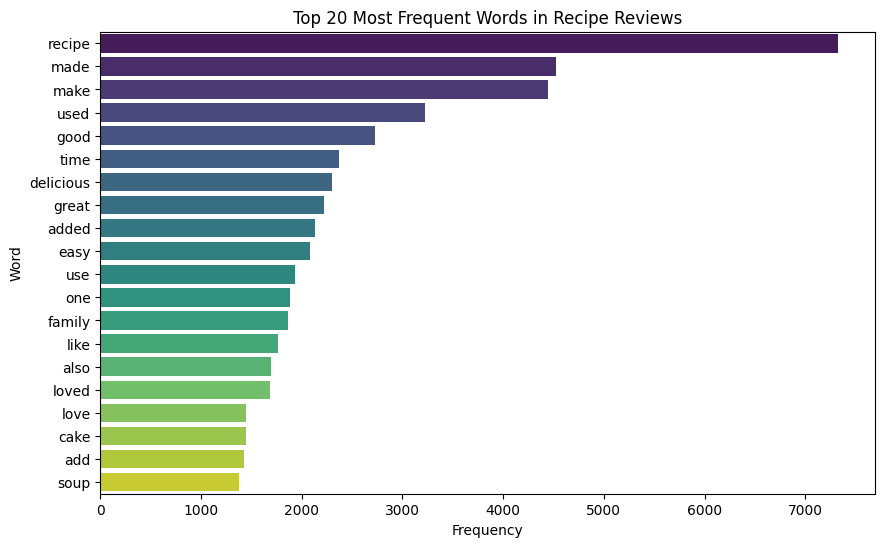

In [18]:
from collections import Counter
words = ' '.join(train['Recipe_Review']).split()
word_counts = Counter(words)

top_words = dict(word_counts.most_common(20))
top_words_df = pd.DataFrame(top_words.items(), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Recipe Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# the top 20 least frequent words in train data

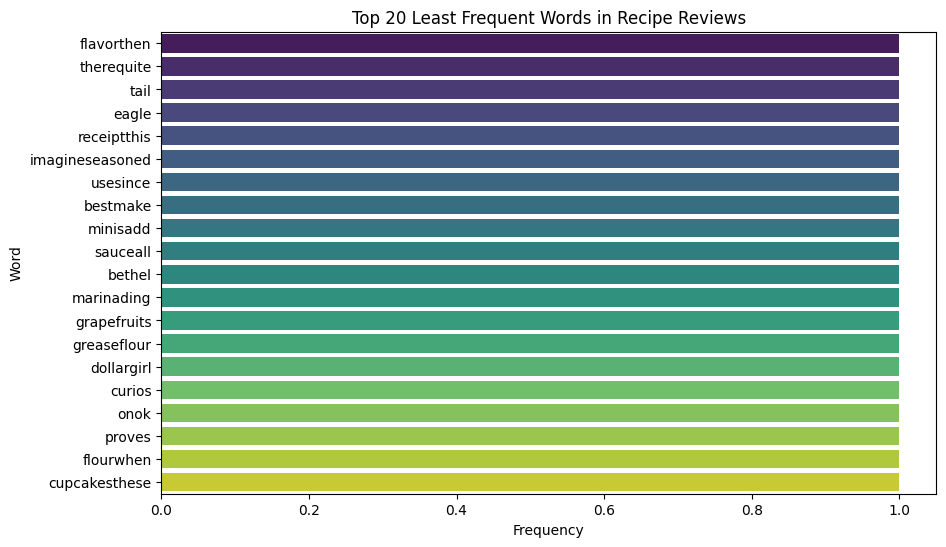

In [19]:
sorted_words = sorted(word_counts.items(), key=lambda x: x[1])

top_least_frequent_words = dict(sorted_words[:20])
top_least_frequent_words_df = pd.DataFrame(top_least_frequent_words.items(), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_least_frequent_words_df, palette='viridis')
plt.title('Top 20 Least Frequent Words in Recipe Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# checking processed text data

In [20]:
for i in range(10):
    print(train['Recipe_Review'][i])
    print("\n")
    
for i in range(10):
    print(test['Recipe_Review'][i])
    print("\n")


great recipe made written wonderfull moist delicate flavorthen next time sour cream used vanilla yogurt added toffee pieces still good made cupcakes rise nicely stay moist


easy quick recipe great fall cool weather made substitutions things hand making ranch dressing mix replacing stewed tomatoes diced tomatoes onion powder using chili hot beans instead drained pinto beans green chilies ingredients hand wouldnt changed anything


think looking something extra special soup wasnt therequite bit work something tasted merely average


favorite grilled chicken recipe great flavor


great basic recipe added teaspoons tuscan seasoning onion celery carrot minced garlic chopped celery yum


absolutely delicious easy tasty filling


good summer good


also minor changes scallops hand used twice imitation crab used cans crab meat drained medium sized tail shrimp work intensive turned amazing make


great tasting followed directions exactly definitely making


inexpensive soup make wonderful fill

# Removing Outliers with Z-score 

## **Calculate z-scores for word counts for RecipeReview**

In [21]:
word_counts = train['Recipe_Review'].apply(lambda x: len(x.split()))
z_scores = zscore(word_counts)
abs_z_scores = np.abs(z_scores)

threshold = 3

new_entry = (abs_z_scores < threshold)

data_no_outliers = train[new_entry]

print("The shape before:", train.shape)
print("The shape after:", data_no_outliers.shape)


The shape before: (13636, 6)
The shape after: (13390, 6)


# Pipeline for Scaling and Vectorizing the text data only 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer


numerical_features = ['UserReputation', 'ThumbsUpCount', 'ThumbsDownCount']
text_features = ['Recipe_Review','RecipeName']

numerical_pipeline = Pipeline([
    ('ss', StandardScaler())
])

text_pipelines = {}
for feature in text_features:
    text_pipelines[feature] = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, smooth_idf=False, stop_words='english'))
    ])

scaling = ColumnTransformer([('num', numerical_pipeline, numerical_features)])
vectorizor = ColumnTransformer([(f'text_{feature}', text_pipelines[feature], feature) for feature in text_features])

# fitting and transforming through the pipeline

## **Applying PCA on scaled data**

**For Training Set**

In [23]:
from sklearn.decomposition import PCA

num = num = scaling.fit_transform(data_no_outliers)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(num)

numm = pd.DataFrame(X_pca,columns = ['column1','column2'])
numm

,column1,column2
0,-0.044894,1.776161
1,-0.092310,-0.118712
2,-0.320050,-0.071301
3,-0.320050,-0.071301
4,-0.320050,-0.071301
...,...,...
13385,-0.320050,-0.071301
13386,-0.320050,-0.071301
13387,-0.320050,-0.071301
13388,-0.320050,-0.071301


In [24]:
vec = vectorizor.fit_transform(data_no_outliers)
vec = vec.toarray()
text = pd.DataFrame(vec)

df_train = pd.concat([numm,text], axis =1 )
df_train

,column1,column2,0,1,2,3,4,5,6,7,...,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176
0,-0.044894,1.776161,0.0,0.0,0.0,0.0,0.0,0.0,0.153597,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.092310,-0.118712,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.146661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13386,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13387,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13388,-0.320050,-0.071301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**For test data**

In [25]:
num = num = scaling.fit_transform(test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(num)
numm = pd.DataFrame(X_pca,columns = ['column1','column2'])
numm
vec = vectorizor.fit_transform(test)
vec = vec.toarray()
text = pd.DataFrame(vec)

df_test = pd.concat([numm,text], axis =1 )
df_test

,column1,column2,0,1,2,3,4,5,6,7,...,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176
0,-0.291900,-0.072908,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.120757,-0.123842,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.291900,-0.072908,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.873868,-0.277367,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.120757,-0.123842,0.0,0.0,0.000000,0.0,0.0,0.0,0.10704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,-0.291900,-0.072908,0.0,0.0,0.190143,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4542,-0.291900,-0.072908,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,-0.291900,-0.072908,0.0,0.0,0.661904,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,-0.120757,-0.123842,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Only using the Text Data after getting 72.61% accuracy in submission from text and num combined data frame**

**For Train Data**

In [26]:
x = vectorizor.fit_transform(data_no_outliers)
x


<13390x1177 sparse matrix of type '<class 'numpy.float64'>'
	with 200802 stored elements in Compressed Sparse Row format>

**For Test Set**

In [27]:
z = vectorizor.transform(test)
z

<4546x1177 sparse matrix of type '<class 'numpy.float64'>'
	with 70559 stored elements in Compressed Sparse Row format>

# Preprocessing is done, processed data is in x and z and we'll train the model now

# **Models**

**Importing the models**

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# train test split

In [29]:
y = data_no_outliers['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (10712, 1177)
Training target vector size: (10712,)
Test feature matrix size: (2678, 1177)
Test target vector size: (2678,)


# Model 1:  **Logistics Regression**

In [30]:
logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(x_train, y_train)

y_pred_lr = logistic_regression_model.predict(x_test)

accuracyLR = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
classification_rep = classification_report(y_test, y_pred_lr)

print("Accuracy:", accuracyLR)
print("Precision:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7677371172516804
Precision: 0.6831225799731878
F1 Score: 0.6988465882443985
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.13      0.21       272
           1       0.33      0.02      0.04        42
           2       0.00      0.00      0.00        43
           3       0.28      0.08      0.13        61
           4       0.27      0.06      0.10       228
           5       0.79      0.98      0.88      2032

    accuracy                           0.77      2678
   macro avg       0.36      0.21      0.23      2678
weighted avg       0.68      0.77      0.70      2678



# Model 2:  **Random Forest**

In [31]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)

accuracyRF = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
classification_rep = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracyRF)
print("Precision:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7692307692307693
Precision: 0.7162927454864593
F1 Score: 0.6906373175829907
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.11      0.19       272
           1       0.00      0.00      0.00        42
           2       1.00      0.02      0.05        43
           3       0.32      0.15      0.20        61
           4       0.46      0.03      0.05       228
           5       0.78      0.99      0.87      2032

    accuracy                           0.77      2678
   macro avg       0.53      0.22      0.23      2678
weighted avg       0.72      0.77      0.69      2678



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

# Model 3:  **LightGBM**

In [32]:
lgbm_model = LGBMClassifier()

lgbm_model.fit(x_train, y_train)

y_pred_lgbm = lgbm_model.predict(x_test)

accuracyLGBM = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='weighted')
f1 = f1_score(y_test, y_pred_lgbm, average='weighted')
classification_rep = classification_report(y_test, y_pred_lgbm)

print("Accuracy:", accuracyLGBM)
print("Precision:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39880
[LightGBM] [Info] Number of data points in the train set: 10712, number of used features: 1169
[LightGBM] [Info] Start training from score -2.381415
[LightGBM] [Info] Start training from score -4.167132
[LightGBM] [Info] Start training from score -4.427090
[LightGBM] [Info] Start training from score -3.585388
[LightGBM] [Info] Start training from score -2.394633
[LightGBM] [Info] Start training from score -0.272856
Accuracy: 0.768857356235997
Precision: 0.6982379199654314
F1 Score: 0.7108053374337543
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.18      0.27       272
           1       0.25      0.05      0.08        42
           2       0.17      0.02      0.04        43
           3       0.28      0.13      0.18        61
  

# Model 4:  **KNN**

## **selecting best k for the k-nearest neighbors algorithm**

In [33]:
def find_best_n_neighbors(x_train, y_train, x_test, y_test, max_neighbors=20):
    best_accuracy = 0
    best_n = 0
    
    for n in range(1, max_neighbors+1):
        knn_model = KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(x_train, y_train)
        y_pred_knn = knn_model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n = n
    
    return best_n, best_accuracy

best_n, best_accuracy = find_best_n_neighbors(x_train, y_train, x_test, y_test)

print("Best n_neighbors:", best_n)
print("Accuracy:", best_accuracy)

Best n_neighbors: 17
Accuracy: 0.760268857356236


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

accuracyknn = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
classification_rep = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracyknn)
print("Precision:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7531740104555639
Precision: 0.6427603239177583
F1 Score: 0.672159528783377
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.08      0.13       272
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        61
           4       0.15      0.03      0.05       228
           5       0.77      0.98      0.86      2032

    accuracy                           0.75      2678
   macro avg       0.23      0.18      0.17      2678
weighted avg       0.64      0.75      0.67      2678



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

# Model 5:  **SVM**

In [35]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

accuracySVM = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
classification_rep = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracySVM)
print("Precision:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7613890963405526
Precision: 0.65645356566209
F1 Score: 0.662812579624116
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.03      0.05       272
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        43
           3       0.29      0.03      0.06        61
           4       0.00      0.00      0.00       228
           5       0.76      1.00      0.87      2032

    accuracy                           0.76      2678
   macro avg       0.29      0.18      0.16      2678
weighted avg       0.66      0.76      0.66      2678



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

# Model 6:  **DecisionTreeClassifier**

In [36]:
cart_model = DecisionTreeClassifier()
cart_model.fit(x_train, y_train)
y_pred_cart = cart_model.predict(x_test)

accuracyDT = accuracy_score(y_test, y_pred_cart)
precision = precision_score(y_test, y_pred_cart, average='weighted')
f1 = f1_score(y_test, y_pred_cart, average='weighted')
classification_rep = classification_report(y_test, y_pred_cart)

print("Accuracy:", accuracyDT)
print("Precision:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6669156086631814
Precision: 0.6547879303479167
F1 Score: 0.6604839215253843
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.22      0.23       272
           1       0.11      0.05      0.07        42
           2       0.11      0.09      0.10        43
           3       0.14      0.16      0.15        61
           4       0.12      0.12      0.12       228
           5       0.81      0.83      0.82      2032

    accuracy                           0.67      2678
   macro avg       0.26      0.24      0.25      2678
weighted avg       0.65      0.67      0.66      2678



# Model 7:  **GradientBoostingClassifier**

In [37]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

accuracyGB = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
f1 = f1_score(y_test, y_pred_gb, average='weighted')
classification_rep = classification_report(y_test, y_pred_gb)

print("Accuracy:", accuracyGB)
print("Preciscion:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7617625093353249
Preciscion: 0.6977964819061908
F1 Score: 0.6826996070252022
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.04      0.08       272
           1       0.31      0.12      0.17        42
           2       0.13      0.07      0.09        43
           3       0.36      0.13      0.19        61
           4       0.35      0.04      0.07       228
           5       0.78      0.99      0.87      2032

    accuracy                           0.76      2678
   macro avg       0.42      0.23      0.25      2678
weighted avg       0.70      0.76      0.68      2678



# Model 8:  **MLPClassifier**

In [38]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,))
mlp_model.fit(x_train, y_train)
y_pred_mlp = mlp_model.predict(x_test)

accuracyMLP = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='weighted')
f1 = f1_score(y_test, y_pred_mlp, average='weighted')
classification_rep = classification_report(y_test, y_pred_mlp)

print("Accuracy:", accuracyMLP)
print("Preciscion:", precision)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.734503360716953
Preciscion: 0.6928138105291065
F1 Score: 0.7093807874638545
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.22      0.28       272
           1       0.20      0.17      0.18        42
           2       0.17      0.09      0.12        43
           3       0.22      0.21      0.21        61
           4       0.25      0.16      0.20       228
           5       0.82      0.91      0.86      2032

    accuracy                           0.73      2678
   macro avg       0.34      0.29      0.31      2678
weighted avg       0.69      0.73      0.71      2678



### **Comparing Performance of Each Model**

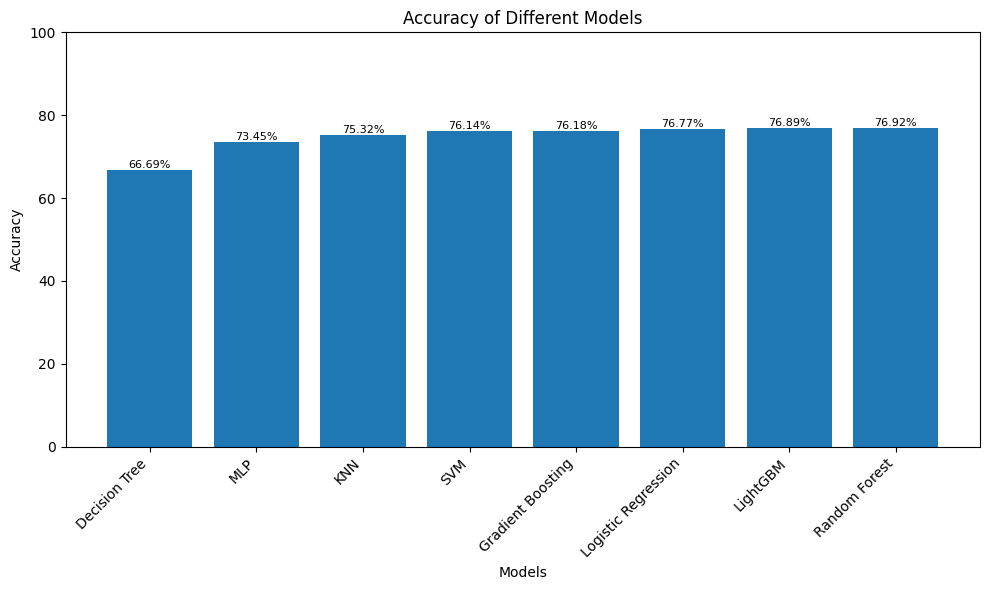

In [39]:
models = ['Logistic Regression', 'Random Forest', 'LightGBM', 'KNN', 'SVM', 'Decision Tree', 'Gradient Boosting', 'MLP']
accuracies = [accuracyLR, accuracyRF, accuracyLGBM, accuracyknn, accuracySVM, accuracyDT, accuracyGB, accuracyMLP]

accuracies_percentage = [accuracy * 100 for accuracy in accuracies]

sorted_accuracies, sorted_models = zip(*sorted(zip(accuracies_percentage, models)))

plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_accuracies)

for i, accuracy in enumerate(sorted_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


## **Picking The Top 3 Best Performing Models For Hyper Parameter tuning**
### 1. Logistic Regression
### 2. RandomForest
### 3. LightGBM

# **HyperParameter Tuning**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 2)

## **For Logistic Regression**

In [41]:
model = LogisticRegression(penalty = 'l2',
                           solver='lbfgs',
                           C = 1.1,
                           max_iter = 200)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracyLRH = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracyLRH)

Accuracy: 0.7830470500373413


# **After Hyperparameter Tuning we got best accuracy with Logistic Regression with these parameters**
**penalty = 'l2',solver='lbfgs', C = 1.1,max_iter = 200**

## **RandomForestClassifier**

In [42]:
model = RandomForestClassifier(max_depth=400,
                               min_samples_split = 4,
                               bootstrap = True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracyRFH = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracyRFH)

Accuracy: 0.7882748319641524


# **After Hyperparameter Tuning we got best accuracy with RandomForestClassifier with these parameters**
**max_depth=400,min_samples_split = 4,bootstrap = True**

## **LightGBM**

In [43]:
lgbm_model = LGBMClassifier(min_child_samples=3,
                            reg_alpha=0.1,
                            reg_lambda=0.1)

lgbm_model.fit(x_train, y_train)

y_pred = lgbm_model.predict(x_test)

accuracyLGBMH = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracyLGBMH)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39703
[LightGBM] [Info] Number of data points in the train set: 10712, number of used features: 1177
[LightGBM] [Info] Start training from score -2.352543
[LightGBM] [Info] Start training from score -4.179253
[LightGBM] [Info] Start training from score -4.458838
[LightGBM] [Info] Start training from score -3.572010
[LightGBM] [Info] Start training from score -2.375373
[LightGBM] [Info] Start training from score -0.278513
Accuracy: 0.7916355489171023


# **After Hyperparameter Tuning we got best accuracy with LightGBM with these parameters**
**min_child_samples=3,reg_alpha=0.1,reg_lambda=0.1**

## **Comparing accuracies**

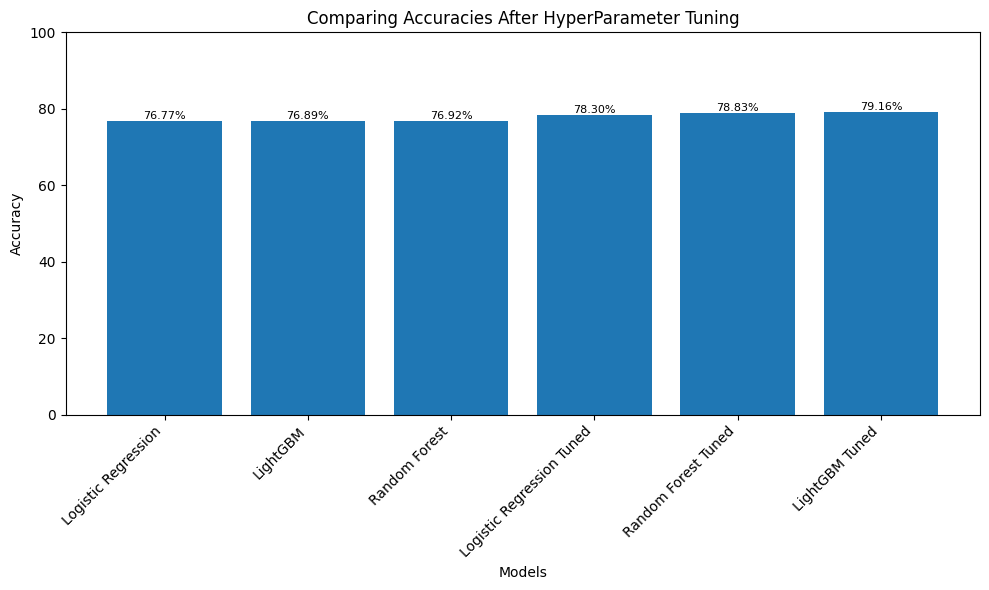

In [44]:
models = ['Logistic Regression', 'Random Forest', 'LightGBM', 'Logistic Regression Tuned', 'Random Forest Tuned', 'LightGBM Tuned']
accuracies = [accuracyLR, accuracyRF, accuracyLGBM, accuracyLRH, accuracyRFH, accuracyLGBMH]

accuracies_percentage = [accuracy * 100 for accuracy in accuracies]

sorted_accuracies, sorted_models = zip(*sorted(zip(accuracies_percentage, models)))

plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_accuracies)

for i, accuracy in enumerate(sorted_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracies After HyperParameter Tuning')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

# **After Hyper Parameter Tuning we found that best model for us is LightGBM**

# Training LightGBM on full data

In [45]:
LightGBM_model = LGBMClassifier(min_child_samples=3,reg_alpha=0.1,reg_lambda=0.1)

LightGBM_model.fit(x, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47411
[LightGBM] [Info] Number of data points in the train set: 13390, number of used features: 1177
[LightGBM] [Info] Start training from score -2.361810
[LightGBM] [Info] Start training from score -4.164725
[LightGBM] [Info] Start training from score -4.360600
[LightGBM] [Info] Start training from score -3.621730
[LightGBM] [Info] Start training from score -2.408029
[LightGBM] [Info] Start training from score -0.273494


LGBMClassifier(min_child_samples=3, reg_alpha=0.1, reg_lambda=0.1)

# Predicting on Test Data with LightGBM

In [46]:
pred= LightGBM_model.predict(z)

submission = pd.DataFrame({"ID": range(1,4547), "Rating": pred}) 

submission.to_csv('submission.csv',index=False) 
